In [2]:
%cd /Users/sumishunsuke/Desktop/RNA/raptcouple_test

/Users/sumishunsuke/Desktop/RNA/raptcouple_test


# Fig. 2d
comparison of structure annotatioins

In [ ]:
data_dir = "example/Jolma2020/outputs"

all_model_params = !ls {data_dir}/*model_params
print(len(all_model_params)) 
# 157
# this is greater than the number of motifs (145) because jolma provided multiple constructs for some RBPs
all_model_params[:20]

157


['example/Jolma2020/outputs/0_BOLL_TGTTCG40NGAC_EMJ_4-91-44-166.51-3.model_params',
 'example/Jolma2020/outputs/100_ZFR-construct4_TCCTTG40NTGGC_AAG_4-999-13-73.51-27.model_params',
 'example/Jolma2020/outputs/101_ZRANB2_TTCACG40NAGT_AAG_4-87-4-21.05-130.model_params',
 'example/Jolma2020/outputs/102_ZRANB2_TTCACG40NAGT_AAG_4-87-4-21.05-130.model_params',
 'example/Jolma2020/outputs/103_DAZ1-construct2_TGGCCT40NATTT_AAG_4-979-5-27.58-42.model_params',
 'example/Jolma2020/outputs/103_DAZ1-construct3_TCATTC40NAGGC_AAG_4-3314-1-12.02-1493.model_params',
 'example/Jolma2020/outputs/103_DAZ1_TTGGAC40NAATT_AAG_4-733-14-91.47-11.model_params',
 'example/Jolma2020/outputs/104_DAZ1-construct2_TGGCCT40NATTT_AAG_4-85-120-662.02-0.model_params',
 'example/Jolma2020/outputs/104_DAZ1-construct3_TCATTC40NAGGC_AAG_4-78-123-1478.83-0.model_params',
 'example/Jolma2020/outputs/104_DAZ1_TTGGAC40NAATT_AAG_4-978-9-58.80-9.model_params',
 'example/Jolma2020/outputs/105_DAZ1-construct2_TGGCCT40NATTT_AAG_4-97

In [7]:
import os, sys
sys.path.append('.')
import glob
import numpy as np
import pandas as pd
from src.plmc import detect_coupling, read_params
from src.structure import nussinov, fold
from src.helper_jolma import remove_isolated_pairs

In [9]:
def fold_all_targets(threshold, min_dist, sanity_check, min_loop_length):
    all_model_params = glob.glob("example/Jolma2020/outputs/*model_params")
    df_log_dca = pd.DataFrame()
    df_log_dca["prefix"] = [int(os.path.basename(all_model_params).split("_")[0]) for all_model_params in all_model_params]
    df_log_dca["model_params"] = [os.path.basename(all_model_params) for all_model_params in all_model_params]

    all_pairs, structures, energies = [], [], []

    for idx, model_params in enumerate(all_model_params):
        params = read_params(model_params)
        pairs = detect_coupling(
            params,
            threshold=threshold,
            min_dist=min_dist,
            sanity_check=sanity_check,
            use_mask_min_dist=True
            )

        rna, energy, ss, table = fold(
            params,
            min_loop_length = min_loop_length,
            threshold=threshold,
            only_match_col=True,
            sanity_check=sanity_check
            )
        all_pairs.append(pairs)
        structures.append(ss)
        energies.append(energy)

    df_log_dca["pairs"] = all_pairs
    df_log_dca["structure"] = structures
    df_log_dca["energy"] = energies
    df_log_dca["structure_rm_isolated"] = [remove_isolated_pairs(structure) for structure in structures]

    return df_log_dca


In [25]:
min_loop_length = 2
min_dist = min_loop_length +1
threshold = 2.5
sanity_check = False


df_res_fold = fold_all_targets(
    threshold,
    min_dist=min_dist,
    sanity_check=sanity_check,
    min_loop_length=min_loop_length
    )
df_res_fold.sort_values("prefix")
df_res_fold.to_csv(f"example/Jolma2020/outputs/comparison_structured/df_log_dca_gapped_th{threshold}_mindist{min_dist}_unsanitized_v2.csv", index=False)


In [21]:
from src.helper_jolma import load_metadata

df_metadata = load_metadata("example/Jolma2020/data/Supplemental_Tables_S1-S8.xlsx")
df_metadata["prefix"] = list(range(1, len(df_metadata)+1))
df_metadata

,Gene Symbol,Barcode,Batch,seed,multinomial,cycle,Mono or multimer,Motif type,Experiment,Number of RBDs in the construct,Note,motif_type,seed_regex,prefix
0,BOLL,TCCCAA40NGCGC,AAG,KUGUUGUGUUKK,1,3,monomeric,Primary,Experiment_1,1,NaN,linear,[GU]UGUUGUGUU[GU][GU],1
1,CARHSP1,TGCAGT40NAAG,AAG,GCCAUGAUCAUGAU,2,3,dimeric,Secondary,Experiment_1,0,NaN,linear,GCCAUGAUCAUGAU,2
2,CARHSP1,TGCAGT40NAAG,AAG,UUGCCUUGUCCCGAU,2,3,monomeric,Primary,Experiment_1,1,NaN,linear,UUGCCUUGUCCCGAU,3
3,CELF1,TTCTAC40NCGA,AAG,UGUGUNUGUGU,1,4b-,dimeric,Primary,Experiment_1,2,NaN,linear,UGUGU[AUGC]UGUGU,4
4,CELF3,TGTTCG40NGAC,AAG,UGUGUNUGUGU,1,4,dimeric,Primary,Experiment_1,2,NaN,linear,UGUGU[AUGC]UGUGU,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,YBX1,TCTTGC40NATAG,AAG,RCCAYRHCAUCGY,1.0,4,NaN,Primary,Experiment_1,1,NaN,structured,[AG]CCA[UC][AG][AUC]CAUCG[UC],141
141,ZC3H12A,TGATGA40NCATT,AAG,NGCAGGUAAGUGCN,2.0,4,NaN,Primary,Experiment_1,1,NaN,structured,[AUGC]GCAGGUAAGUGC[AUGC],142
142,ZC3H12B,TGAATG40NGTAG,AAG,NGCAGGUAAGUGSN,2.0,2,NaN,Primary,Experiment_1,1,NaN,structured,[AUGC]GCAGGUAAGUG[GC][AUGC],143
143,ZC3H12B,TGAATG40NGTAG,AAG,SCAGGUAUUAUGS,2.0,2,NaN,Secondary,Experiment_1,0,NaN,structured,[GC]CAGGUAUUAUG[GC],144


[9, 10, 32, 94]


Text(-0.1, 0.34, 'N.S. (p=1.00)')

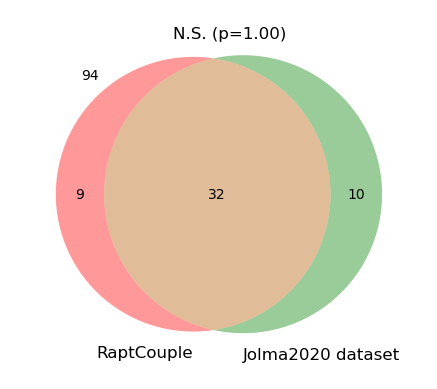

In [45]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from statsmodels.stats import contingency_tables


def take_structure_stat(csvfile):
    df_dca_and_target = pd.read_csv(csvfile)
    df_dca_and_target["n_bp"] = [strct.count("(") for strct in df_dca_and_target["structure_rm_isolated"]]

    dict_prefix_to_jolma = {}
    dict_prefix_to_dca = {}
    for idx in set(df_dca_and_target["prefix"]):
        df = df_dca_and_target[df_dca_and_target["prefix"] == idx]
        dict_prefix_to_jolma[idx] = "structured" if "structured" in list(df["motif_type"]) else "linear"

        # if ((df["energy"] > 1) * (df["n_bp"] > 0)).sum() >0:
        if (df["n_bp"] > 0).sum() >0:
            dict_prefix_to_dca[idx] = "structured"
        else:
            dict_prefix_to_dca[idx] = "linear"

    only_dca, only_jolma,common_struct, common_linear = 0, 0, 0, 0
    for k in dict_prefix_to_dca.keys():
        if dict_prefix_to_dca[k] == "structured" and dict_prefix_to_jolma[k] == "structured":
            common_struct += 1
        elif dict_prefix_to_dca[k] == "linear" and dict_prefix_to_jolma[k] == "linear":
            common_linear += 1
        elif dict_prefix_to_dca[k] == "linear" and dict_prefix_to_jolma[k] == "structured":
            only_jolma += 1
        elif dict_prefix_to_dca[k] == "structured" and dict_prefix_to_jolma[k] == "linear":
            only_dca += 1
        else:
            raise ValueError

    return [only_dca, only_jolma,common_struct, common_linear]




counts = take_structure_stat("example/Jolma2020/outputs/comparison_structured/df_log_dca_gapped_th2.5_mindist3_unsanitized.csv")
only_raptcouple, only_jolma, common_struct, common_linear = counts
print(counts)

venn = venn2(
    subsets = counts,
    set_labels = ("RaptCouple", "Jolma2020 dataset"),
    )


plt.text(-0.3, 0.25, counts[3])  # 左側のラベルの位置を調整


res_mcnemar = contingency_tables.mcnemar(
        [
            [common_linear, only_raptcouple],
            [only_jolma, common_struct]
        ]
        )
p = res_mcnemar.pvalue
plt.text(-0.1, 0.34, f"N.S. (p={p:.2f})", fontsize=12)  # 右側のラベルの位置を調整
